In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN
import data_pipeline2 as dp 

import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
#os.environ["OMP_NUM_THREADS"] = "1"

In [2]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

from sklearn.decomposition import PCA


In [3]:
df_train_st, df_test_st = dp.get_cmapss_data(0,80, scaling = 'standard')

df_train_mm, df_test_mm = dp.get_cmapss_data(0,80, scaling = (-1,1))



C:\Users\livb\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_array_api.py:776: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\livb\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\_array_api.py:793: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


In [4]:
df_train_mm

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,-1.0,-0.632530,-0.207455,-0.380486,-1.0,...,0.266525,-5.882353e-01,-0.600784,-0.272028,-1.0,-0.4,-1.0,-1.0,0.448819,0.460821
1,1,2,0.0019,-0.0003,100.0,-1.0,-0.433735,-0.113379,-0.294733,-1.0,...,0.530917,-4.411765e-01,-0.674373,-0.177376,-1.0,-0.4,-1.0,-1.0,0.354331,0.473626
2,1,3,-0.0043,0.0003,100.0,-1.0,-0.313253,-0.283337,-0.258947,-1.0,...,0.590618,-5.588235e-01,-0.656414,-0.285110,-1.0,-0.8,-1.0,-1.0,0.275591,0.252610
3,1,4,0.0007,0.0000,100.0,-1.0,-0.313253,-0.514089,-0.337610,-1.0,...,0.778252,-4.117647e-01,-0.650222,-0.666795,-1.0,-0.4,-1.0,-1.0,0.165354,0.335282
4,1,5,-0.0019,-0.0002,100.0,-1.0,-0.301205,-0.511427,-0.190749,-1.0,...,0.492537,-5.294118e-01,-0.650532,-0.195845,-1.0,-0.2,-1.0,-1.0,0.196850,0.420181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,-1.0,0.373494,0.159973,0.565834,-1.0,...,-0.658849,1.176471e-01,-0.611312,0.313582,-1.0,0.6,-1.0,-1.0,-0.448819,-0.779262
20627,100,197,-0.0016,-0.0005,100.0,-1.0,0.403614,0.449301,0.732951,-1.0,...,-0.577825,-9.094947e-13,-0.622665,0.454406,-1.0,0.2,-1.0,-1.0,-0.748031,-0.261795
20628,100,198,0.0004,0.0000,100.0,-1.0,0.331325,0.358775,0.550641,-1.0,...,-0.437100,5.882353e-02,-0.575704,0.844556,-1.0,0.8,-1.0,-1.0,-0.527559,-0.891162
20629,100,199,-0.0011,0.0003,100.0,-1.0,0.216867,0.483026,0.494936,-1.0,...,-0.582090,2.941176e-02,-0.593869,0.646787,-1.0,0.2,-1.0,-1.0,-0.763780,-0.527349


In [5]:
df_train_st

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,24,25
0,1,1,-0.0007,-0.0004,100.0,0.0,-1.714694,-0.128772,-0.919490,-0.00115,...,-0.000552,-0.264157,0.331646,-1.058954,-0.240439,-0.599332,-0.001092,-0.782855,1.347058,1.190592
1,1,2,0.0019,-0.0003,100.0,0.0,-1.055642,0.217986,-0.637000,-0.00115,...,-0.000552,-0.189405,1.169417,-0.370767,-0.631974,-0.270947,-0.001092,-0.782855,1.013970,1.233100
2,1,3,-0.0043,0.0003,100.0,0.0,-0.656217,-0.408469,-0.519111,-0.00115,...,-0.000552,-1.011681,1.358591,-0.921316,-0.536424,-0.644718,-0.001092,-2.083809,0.736397,0.499365
3,1,4,0.0007,0.0000,100.0,0.0,-0.656217,-1.259008,-0.778245,-0.00115,...,-0.000552,-1.534947,1.953138,-0.233130,-0.503476,-1.968937,-0.001092,-0.782855,0.347794,0.773823
4,1,5,-0.0019,-0.0002,100.0,0.0,-0.616274,-1.249194,-0.294453,-0.00115,...,-0.000552,-0.974305,1.047805,-0.783679,-0.505124,-0.335022,-0.001092,-0.132378,0.458823,1.055673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,0.0,1.620507,1.225548,2.197908,-0.00115,...,-0.000552,1.978413,-2.600551,2.244340,-0.296451,1.432383,-0.001092,2.469530,-1.817280,-2.926274
20627,100,197,-0.0016,-0.0005,100.0,0.0,1.720363,2.291993,2.748430,-0.00115,...,-0.000552,1.866284,-2.343815,1.693791,-0.356857,1.920956,-0.001092,1.168576,-2.872059,-1.208372
20628,100,198,0.0004,0.0000,100.0,0.0,1.480708,1.958320,2.147861,-0.00115,...,-0.000552,2.053165,-1.897905,1.969066,-0.106999,3.274543,-0.001092,3.120007,-2.094853,-3.297762
20629,100,199,-0.0011,0.0003,100.0,0.0,1.101254,2.416303,1.964354,-0.00115,...,-0.000552,3.174450,-2.357327,1.831428,-0.203647,2.588405,-0.001092,1.168576,-2.927574,-2.089963


In [6]:
X_standard = df_train_st[df_train_st.columns].to_numpy().T

In [7]:
X_minmax = df_train_mm[df_train_mm.columns].to_numpy().T

C:\Users\livb\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


2 5
2 6
2 7
2 8
2 9
1 10
1 11
2 12
2 13
2 14
2 15
1 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
1 24
1 25


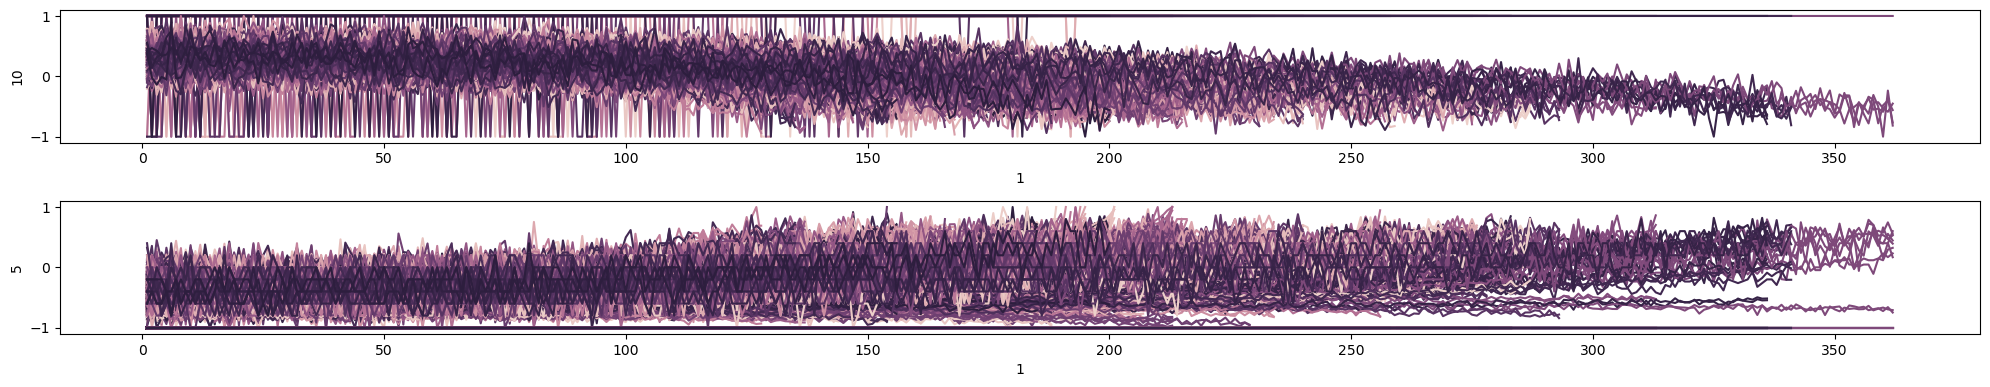

C:\Users\livb\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [ ]:
cluster_amts = [4]

for n_clusters in cluster_amts:
    
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")


    kmeans = kmeans.fit(X_minmax[5:])

    
    plt.figure(figsize = (20,15))

    labs = kmeans.labels_ + 1
    

    i=0
    for column in df_train_mm.columns[5:]:
        plt.subplot(8,1,labs[i])
        sns.lineplot(df_train_mm, x = 1, y = column, hue = 0, legend = False)
        print(labs[i], column)

        i+=1
    plt.tight_layout()
    plt.show()

C:\Users\livb\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


(array([1, 2, 3, 4]), array([8, 8, 2, 1], dtype=int64))
2 5
1 6
1 7
1 8
2 9
4 10
2 11
1 12
3 13
2 14
1 15
2 16
1 17
3 18
1 19
2 20
1 21
2 24
2 25


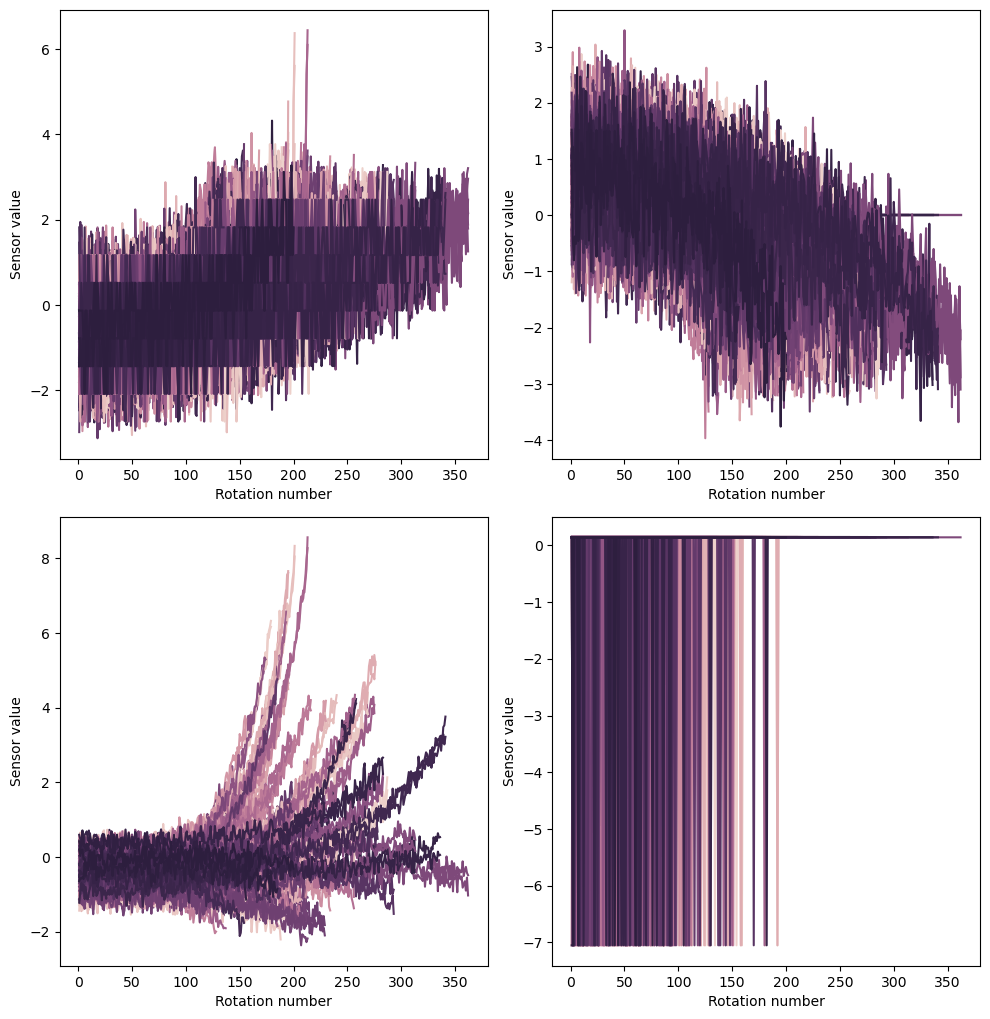

In [14]:
cluster_amts = [4]

for n_clusters in cluster_amts:
    
    
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto")


    kmeans = kmeans.fit(X_standard[5:])

    
    plt.figure(figsize = (10,20))

    labs = kmeans.labels_ + 1
    
    print(np.unique(labs, return_counts = True))


    i=0
    for column in df_train_st.columns[5:]:
        plt.subplot(4,2,labs[i])
        sns.lineplot(df_train_st, x = 1, y = column, hue = 0, legend = False)
        plt.xlabel('Rotation number')
        plt.ylabel('Sensor value')
        print(labs[i], column)

        i+=1

    plt.tight_layout()
    plt.show()

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
For n_clusters = 2 The average silhouette_score is : 0.896914556452043


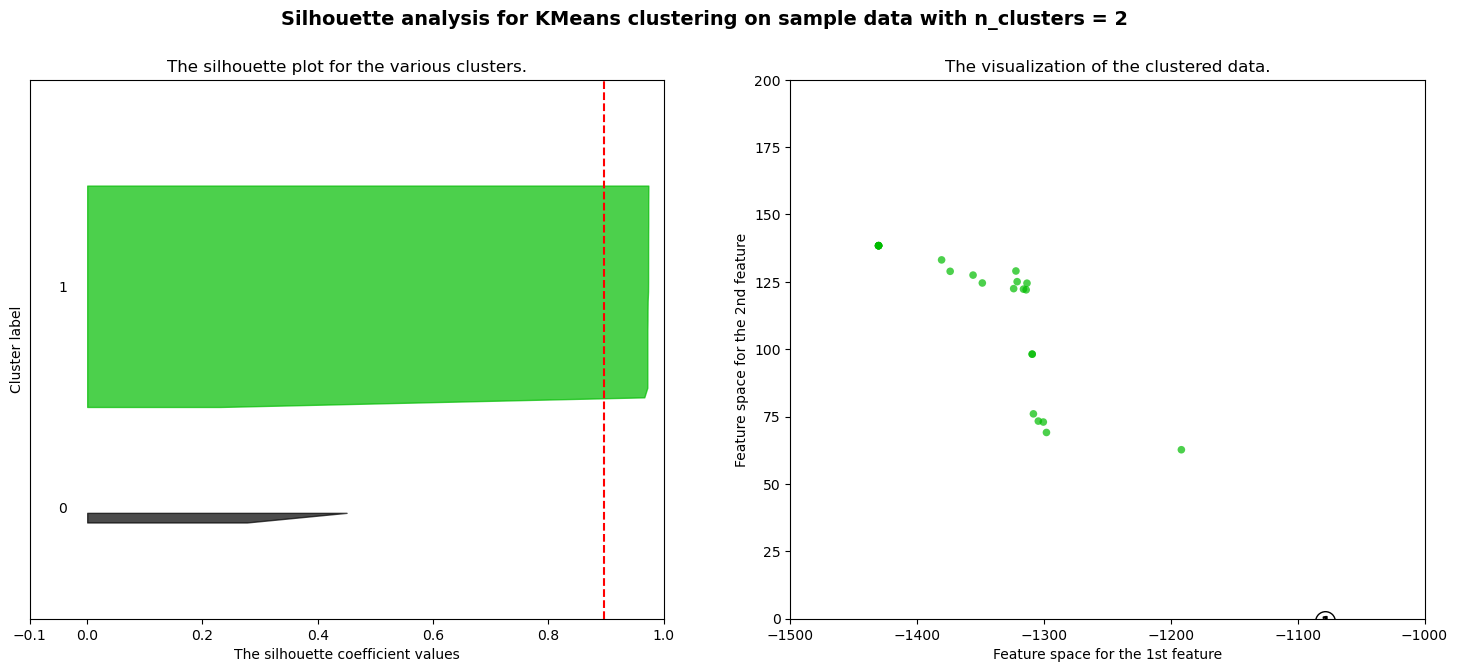

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[1 2 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
For n_clusters = 3 The average silhouette_score is : 0.8849788296906228


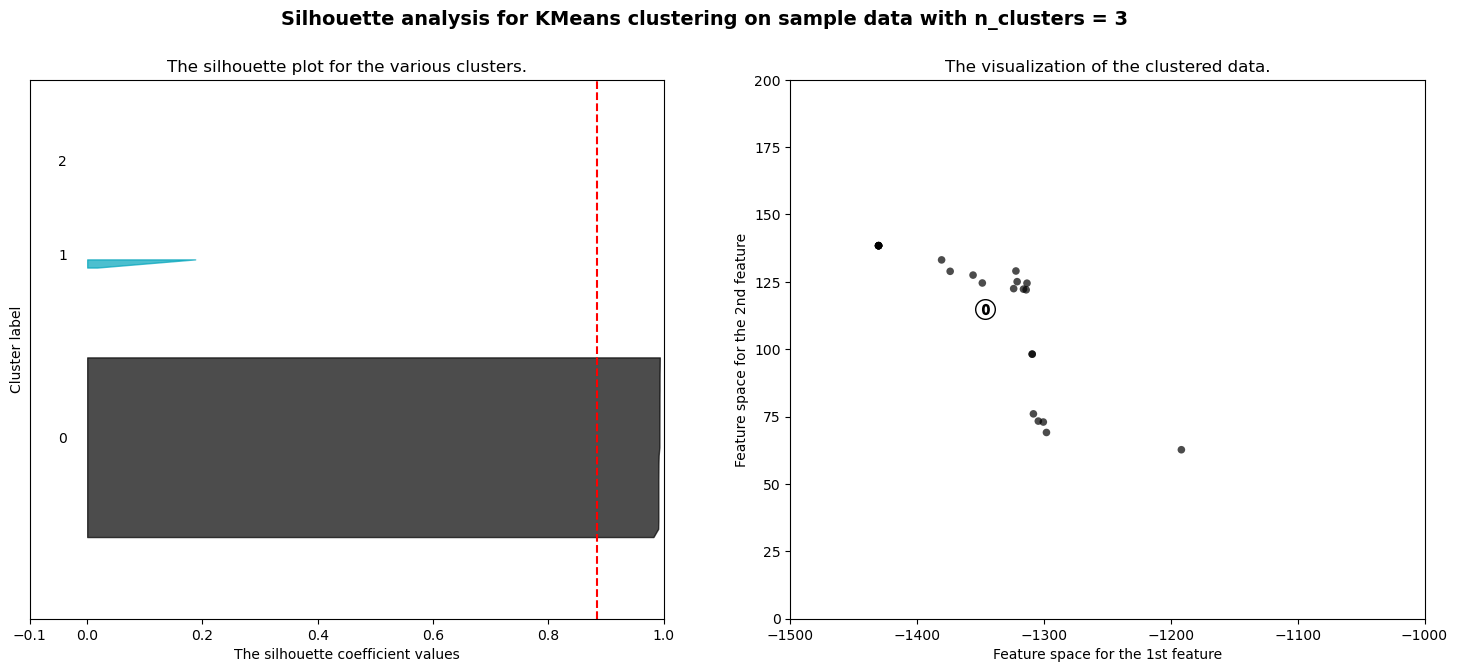

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
For n_clusters = 4 The average silhouette_score is : 0.8744668282121155


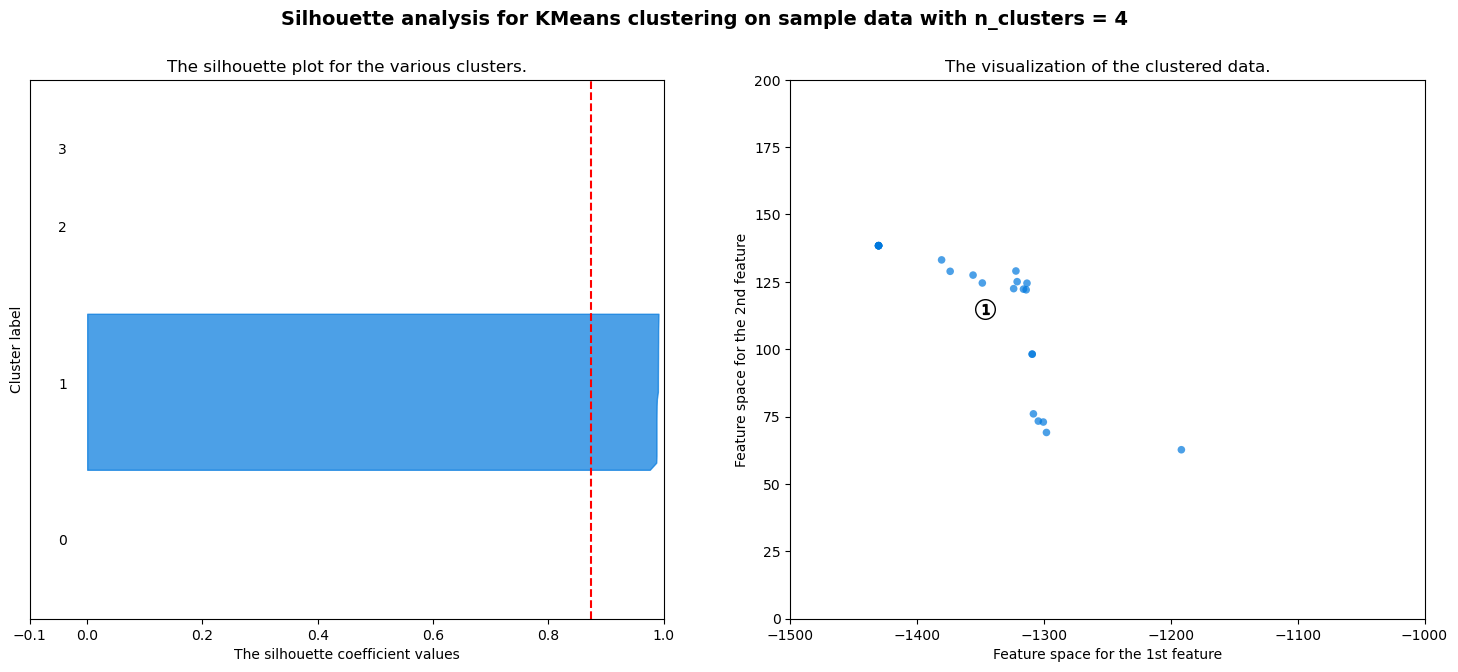

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 0 0 1 4 0 0 0 4 0 0 0 4 4 0 0 0 4 0 4 0 4 4 0 0]
For n_clusters = 5 The average silhouette_score is : 0.4871857533393082


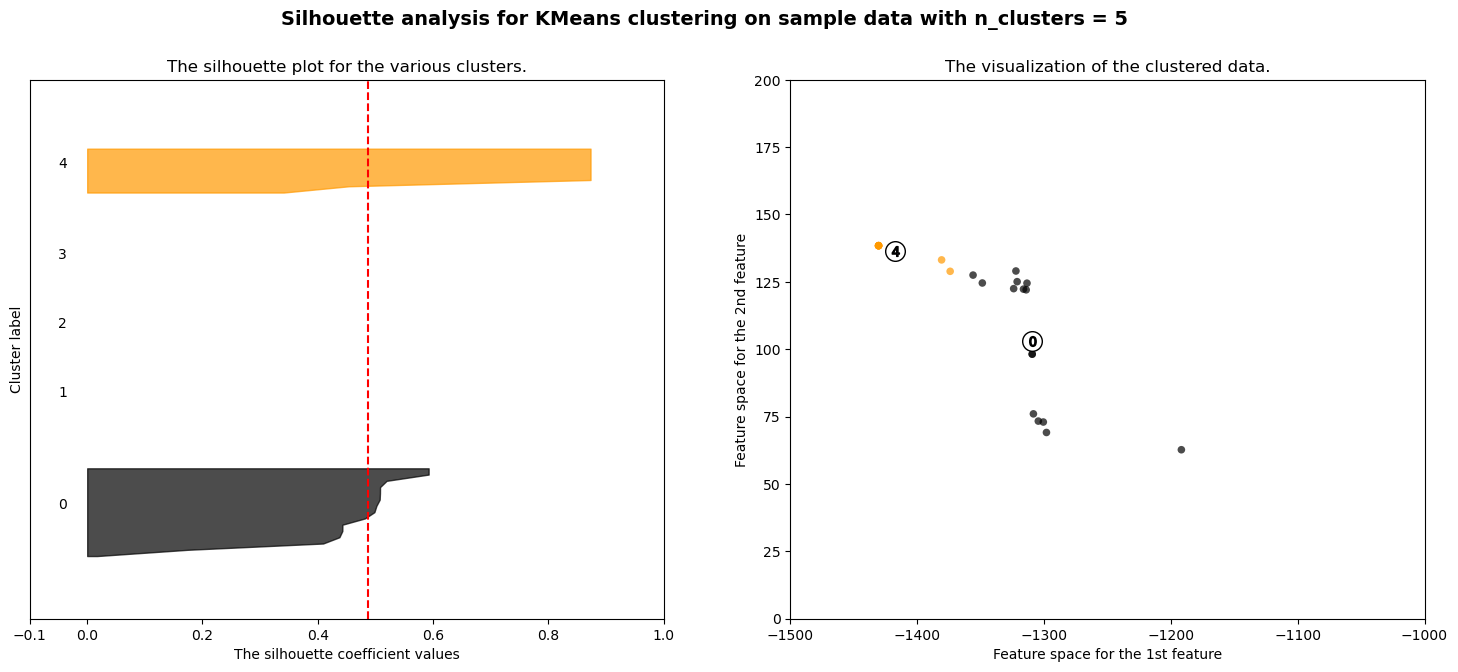

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 0 0 1 4 0 0 0 4 5 5 0 4 4 0 5 0 4 0 4 0 4 4 5 5]
For n_clusters = 6 The average silhouette_score is : 0.4619582838868542


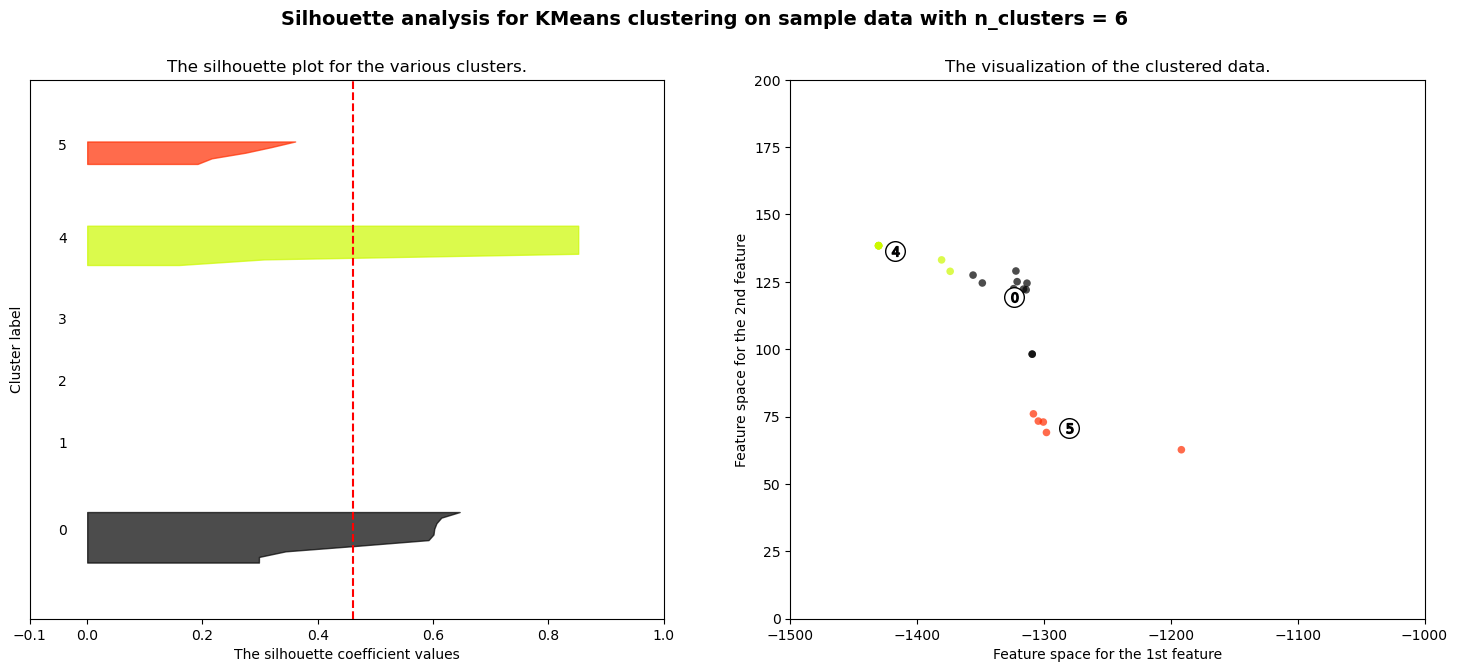

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 4 4 1 5 0 0 0 5 6 4 0 0 5 0 4 0 0 0 5 0 5 5 4 4]
For n_clusters = 7 The average silhouette_score is : 0.4727503648877804


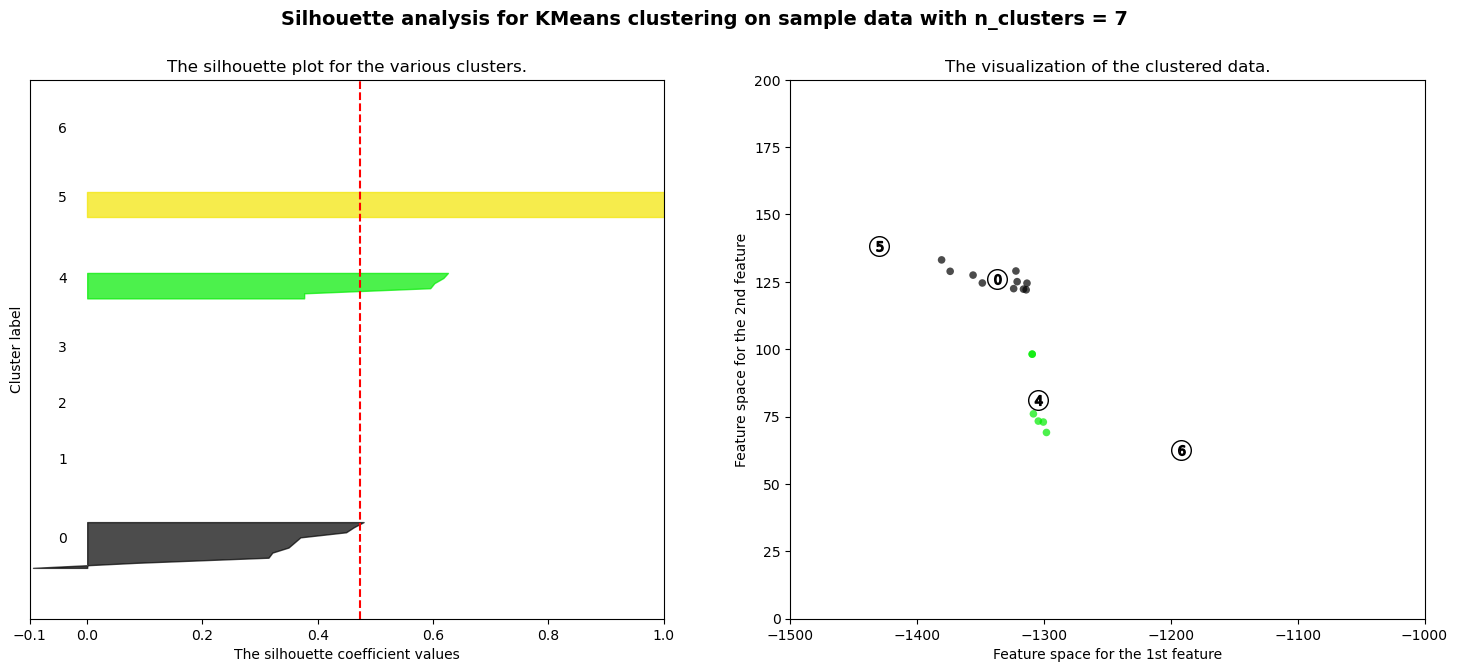

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


[3 2 4 4 1 0 6 6 6 0 5 4 6 7 0 6 4 6 7 6 0 6 0 0 4 4]
For n_clusters = 8 The average silhouette_score is : 0.5286433383820852


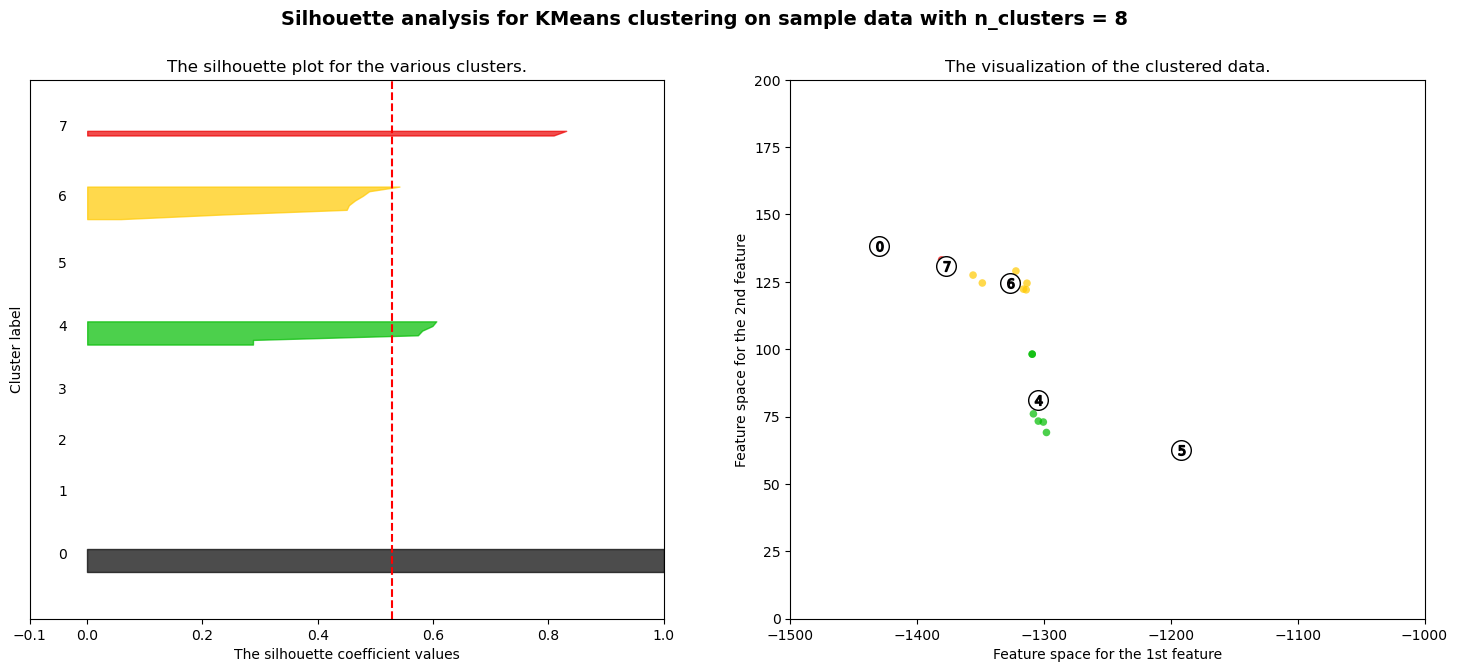

In [23]:
for n_clusters in cluster_amts:


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init = 'auto')
    #clusterer = DBSCAN(eps = 10, min_samples = 5)
    
    cluster_labels = clusterer.fit_predict(X_minmax)
    print(cluster_labels)
    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_minmax, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_minmax, cluster_labels)

    y_lower = 10
    
    if (silhouette_avg>0.25):
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_minmax) + (n_clusters + 1) * 10])
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        # Reduce to 2 dimensions using PCA
        pca = PCA(n_components=2)
        X_2d = pca.fit_transform(X_minmax)
        
        ax2.set_ylim(0,200)
        ax2.set_xlim(-1500,-1000)

        ax2.scatter(
            X_2d[:, 0], X_2d[:, 1], marker="o", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )


        # Labeling the clusters
        centers = clusterer.cluster_centers_

        centers_2d = pca.transform(centers)
        

        # Draw white circles at cluster centers
        ax2.scatter(
            centers_2d[:, 0],
            centers_2d[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers_2d):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.8857968505126145


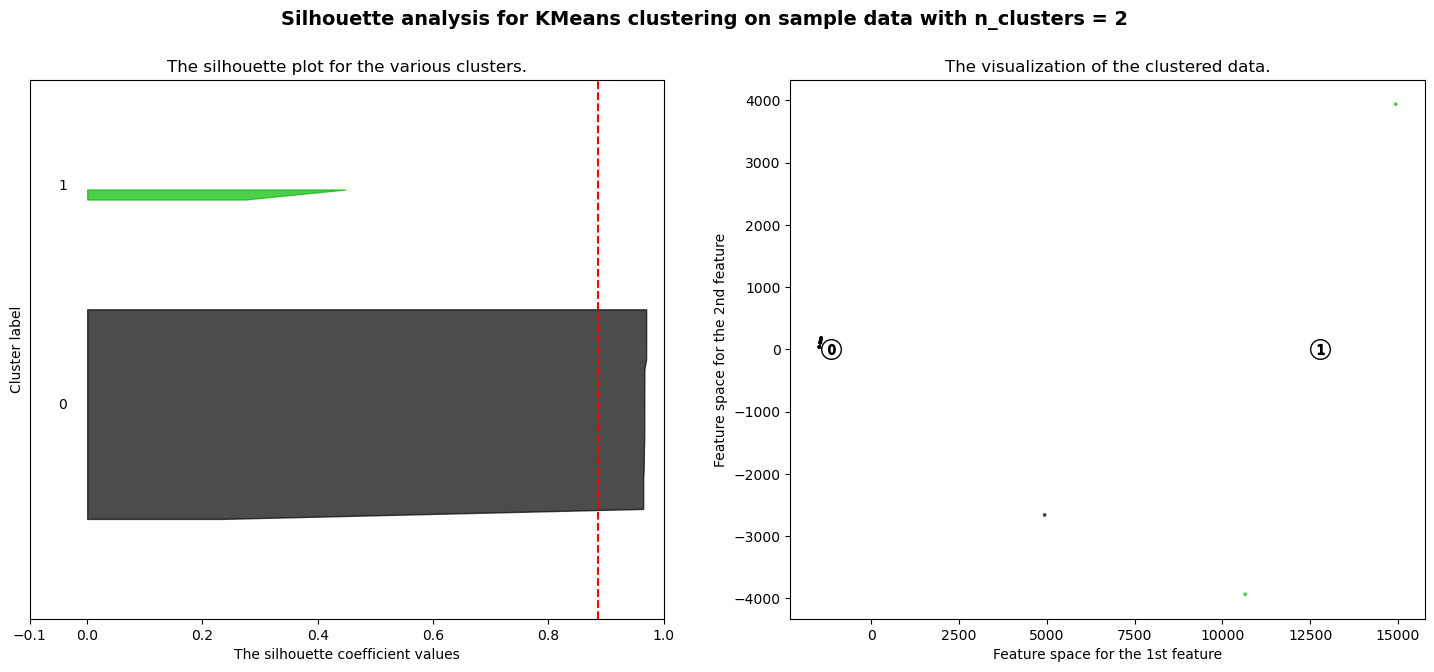

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.8713600508510085


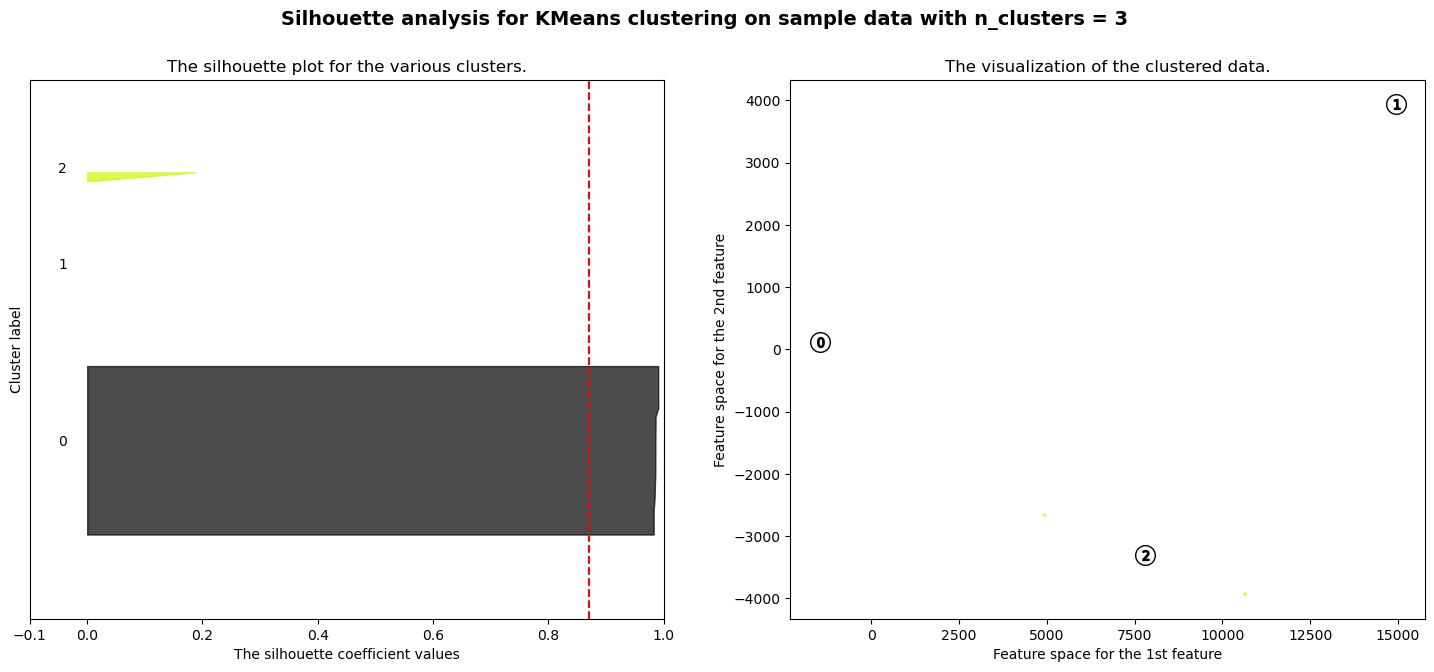

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.8587973996879374


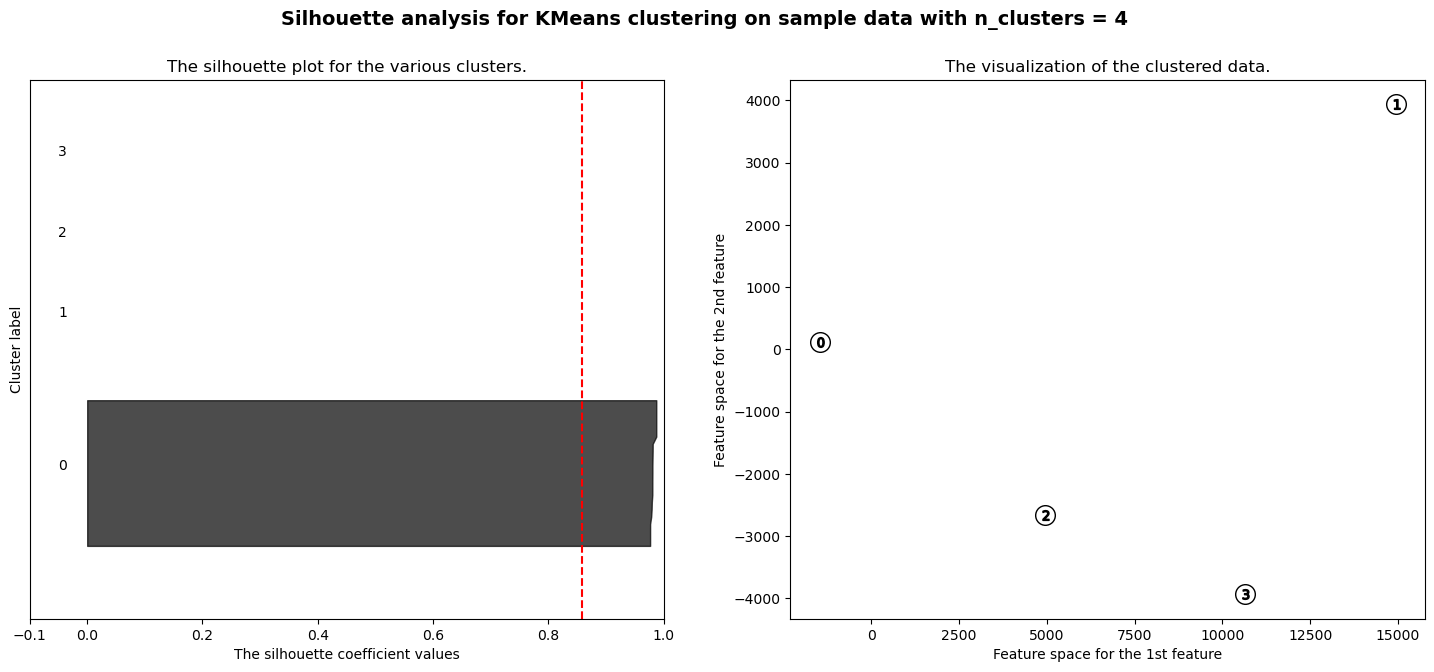

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.32880361232200533


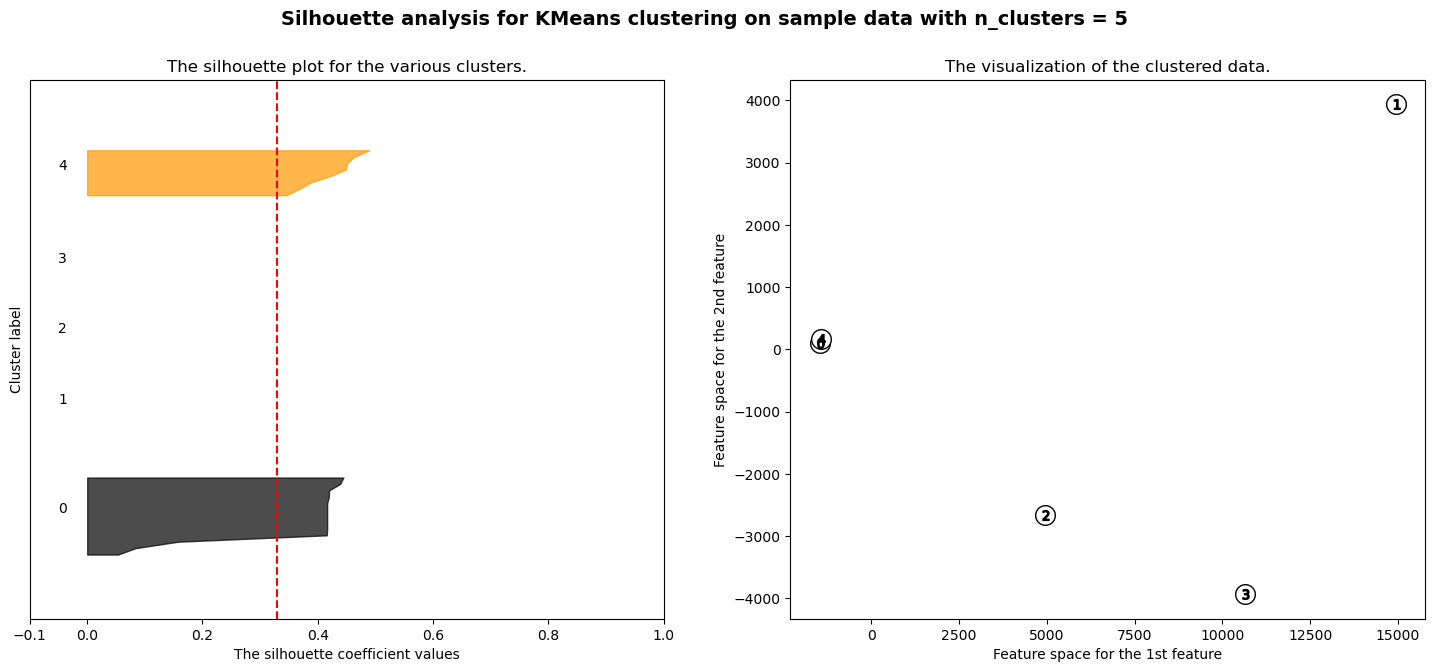

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.3512635860325271


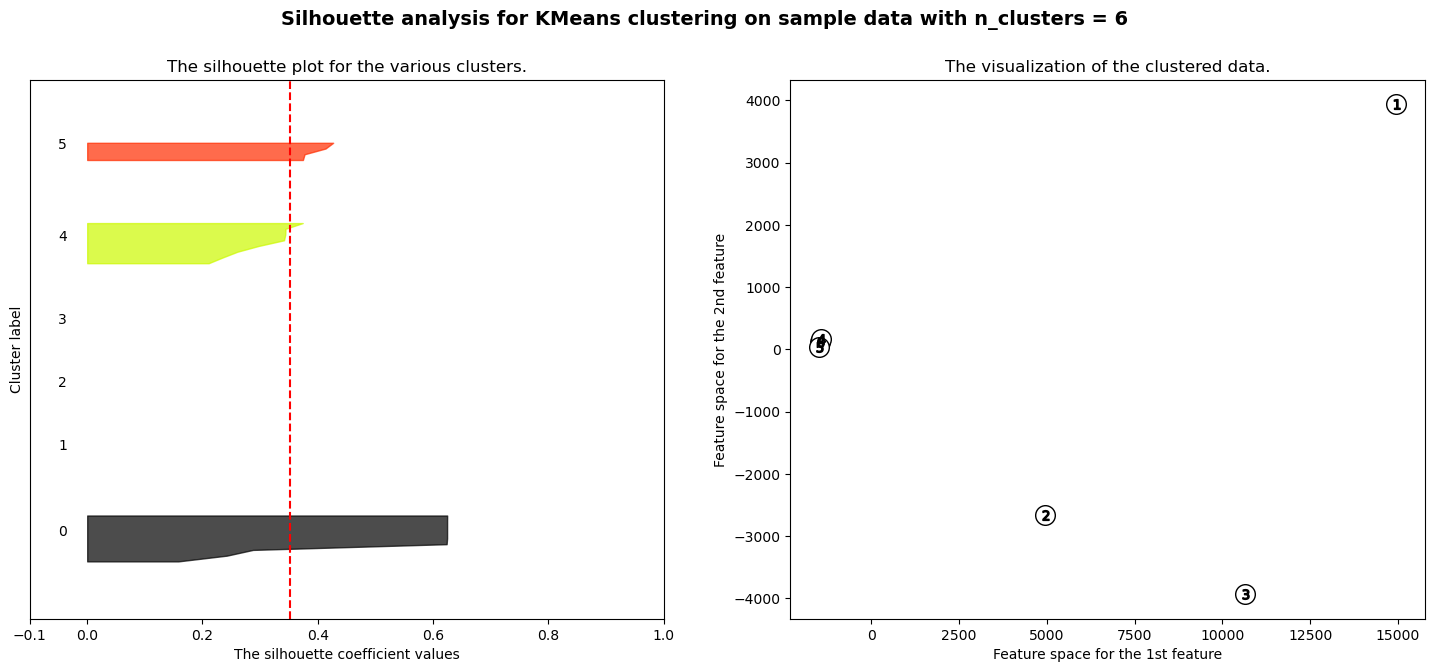

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 7 The average silhouette_score is : 0.42293567182536945


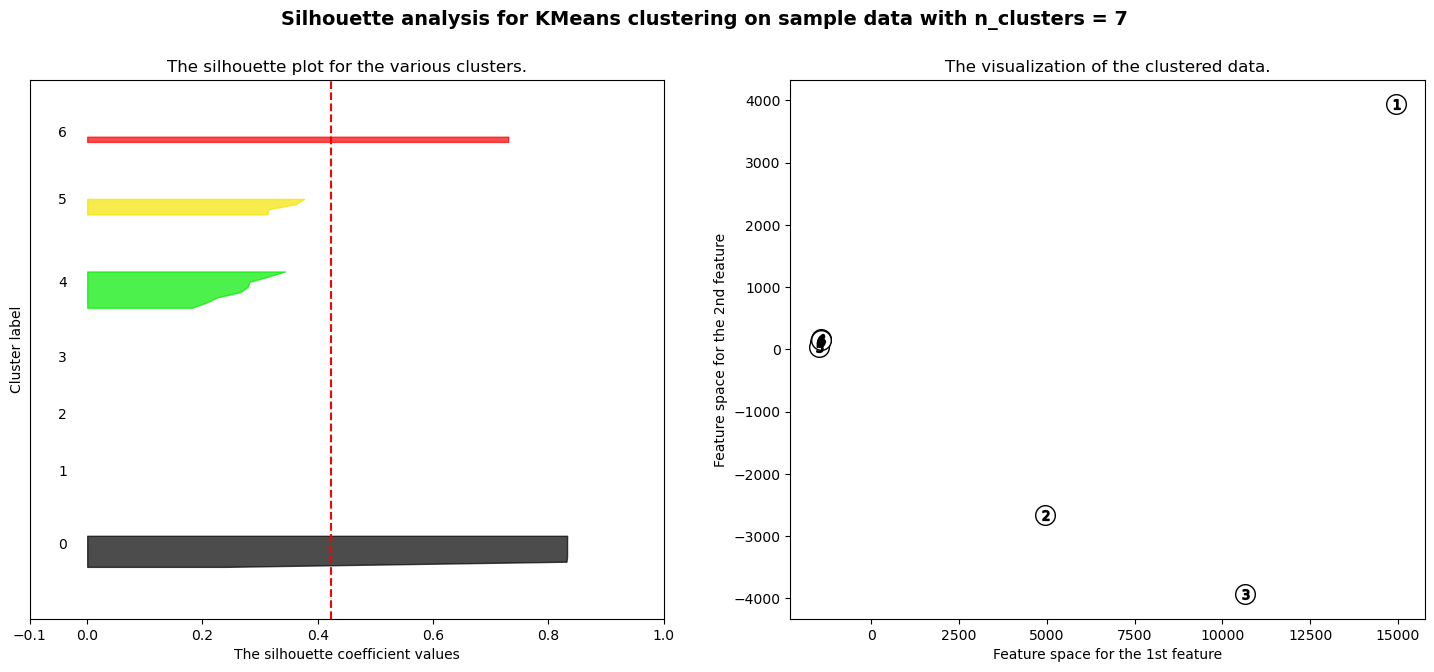

C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lefti\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.4343882173259916


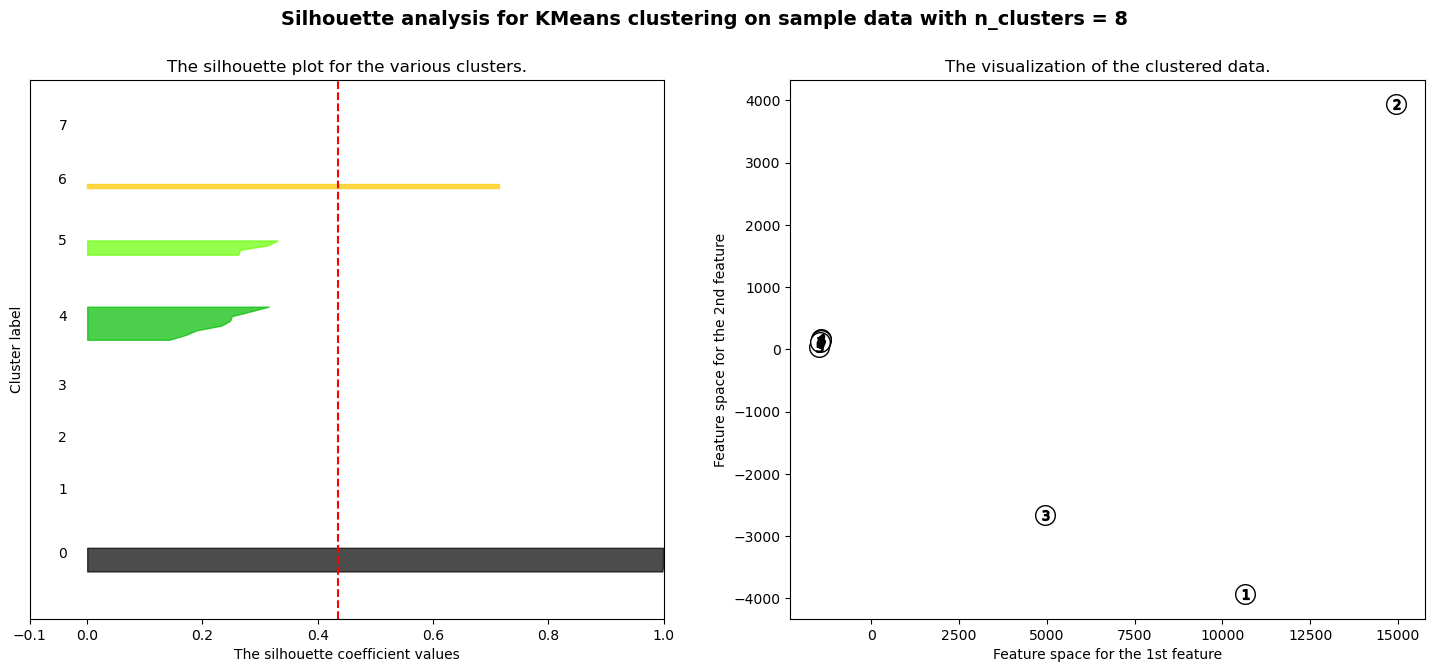

In [19]:
for n_clusters in cluster_amts:

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_standard)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_standard, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_standard, cluster_labels)

    y_lower = 10
    
    if (silhouette_avg>0.25):
            # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X_standard) + (n_clusters + 1) * 10])

        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

        # Reduce to 2 dimensions using PCA
        pca = PCA(n_components=2)
        X_2d = pca.fit_transform(X_standard)

        ax2.scatter(
            X_2d[:, 0], X_2d[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = clusterer.cluster_centers_

        centers_2d = pca.transform(centers)

        # Draw white circles at cluster centers
        ax2.scatter(
            centers_2d[:, 0],
            centers_2d[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers_2d):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

    plt.show()